# Gradient Descent Algorithm
The goal of this algorithm is to *minimize* the error function using *iterative* methods.  

#### Mean Square Error (MSE):

$$ MSE_{(m,b)} = \frac{1}{n} \sum_{i=1}^{n} (y_i - (mx_i+b))^2 $$
$$ \frac {\partial(MSE_{(m,b)})} {\partial m} = \frac{-2}{n} \sum_{i=1}^{n}\, x_i (y_i-(mx_i+b)) $$
$$ \frac {\partial(MSE_{(m,b)})} {\partial b} = \frac{-2}{n} \sum_{i=1}^{n}\, (y_i-(mx_i+b)) $$


In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

(Text(0.5, 0, 'X'), Text(0, 0.5, 'y'))

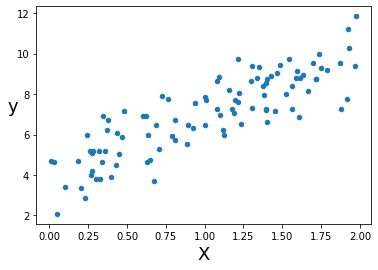

In [120]:
# Random data set with noise (100 x 1 numpy matrix)
X = 2*np.random.rand(100, 1)
y = 3*X + 4 + np.random.randn(100, 1)

# Plot the data
plt.scatter(X, y, s=20)
plt.xlabel('X', size=18), plt.ylabel('y', rotation=0, size=18)

In [91]:
class GradientDescent:
    def __init__(self, learningRate=0.01, iterations=1000):
        self.rate, self.iter = learningRate, iterations

    def fit(self, X, y):
        b, m, n = 0, 0, X.shape[0]
        self.cost = [None]*self.iter
        for i in range(self.iter):
            yPred = m*X + b
            gradM = -2/n * sum(X * (y - yPred))
            gradB = -2/n * sum(y - yPred)
            m -= self.rate * gradM
            b -= self.rate * gradB
            self.cost[i] = 1/n * np.sum(np.square(y - yPred))
        self.m, self.b = m, b

    def predict(self, X):
        return self.m * X + self.b

Slope = [3.04340863], Intercept = [3.92629583]


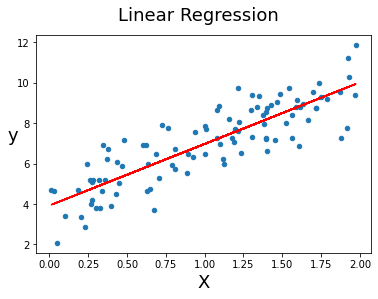

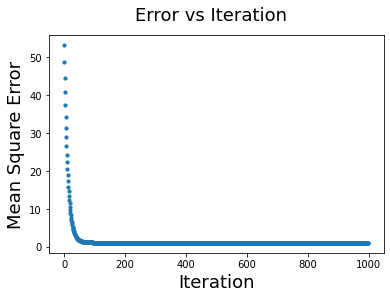

In [124]:
clf = GradientDescent()
clf.fit(X, y)

# Plot our linear model
plt.figure(0)
plt.scatter(X, y, s=20)
plt.plot(X, clf.predict(X), color='red')
plt.suptitle('Linear Regression', size=18)
plt.xlabel('X', size=18), plt.ylabel('y', rotation=0, size=18)

# Plot MSE vs iteration
plt.figure(1)
plt.scatter(range(clf.iter), clf.cost, s=10)
plt.suptitle('Error vs Iteration', size=18)
plt.xlabel('Iteration', size=18), plt.ylabel('Mean Square Error', size=18)

print(f'Slope = {clf.m}, Intercept = {clf.b}')

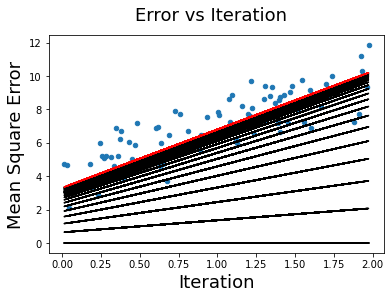

In [140]:
# Plotting the transition from m, b = 0, 0 to their final values:
def plotGradientDescent(X, y, rate=0.001, iter=1000):
    b, m, n = 0, 0, X.shape[0]
    for i in range(iter):
        if i % 50 == 0:
            plt.plot(X, m*X+b, color='black')
        yPred = m*X + b
        gradM = -2/n * sum(X * (y - yPred))
        gradB = -2/n * sum(y - yPred)
        m -= rate * gradM
        b -= rate * gradB
    plt.plot(X, m*X+b, color='red')
    plt.scatter(X, y, s=20)
    plt.suptitle('Error vs Iteration', size=18)
    plt.xlabel('Iteration', size=18), plt.ylabel('Mean Square Error', size=18)


plt.figure(2)
plotGradientDescent(X, y)